In [158]:
%%bash

gdalwarp -overwrite -tr 200 200 -r cubic /shared_space/G1/s2/B02_composite.tif /shared_space/G1/s2/B02_composite_100m.tif
gdalwarp -overwrite -tr 200 200 -r cubic /shared_space/G1/s2/B03_composite.tif /shared_space/G1/s2/B03_composite_100m.tif
gdalwarp -overwrite -tr 200 200 -r cubic /shared_space/G1/s2/B04_composite.tif /shared_space/G1/s2/B04_composite_100m.tif
gdalwarp -overwrite -tr 200 200 -r cubic /shared_space/G1/s2/B08_composite.tif /shared_space/G1/s2/B08_composite_100m.tif
gdalwarp -overwrite -tr 200 200 -r cubic /shared_space/G1/gedi/gedi_cropped_10m_res.tif /shared_space/G1/gedi/gedi_cropped_100m_res.tif

Creating output file that is 242P x 187L.
Processing /shared_space/G1/s2/B02_composite.tif [1/1] : 0Using internal nodata values (e.g. 65535) for image /shared_space/G1/s2/B02_composite.tif.
Copying nodata values from source /shared_space/G1/s2/B02_composite.tif to destination /shared_space/G1/s2/B02_composite_100m.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 242P x 187L.
Processing /shared_space/G1/s2/B03_composite.tif [1/1] : 0Using internal nodata values (e.g. 65535) for image /shared_space/G1/s2/B03_composite.tif.
Copying nodata values from source /shared_space/G1/s2/B03_composite.tif to destination /shared_space/G1/s2/B03_composite_100m.tif.
...10...20...30...40...50...60...70...80...90...100 - done.
Creating output file that is 242P x 187L.
Processing /shared_space/G1/s2/B04_composite.tif [1/1] : 0Using internal nodata values (e.g. 65535) for image /shared_space/G1/s2/B04_composite.tif.
Copying nodata values from source /shared_spa

proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/

In [159]:
%%bash

# gdalinfo /shared_space/G1/s2/B02_composite_100m.tif
gdalinfo /shared_space/G1/gedi/gedi_cropped_100m_res.tif

Driver: GTiff/GeoTIFF
Files: /shared_space/G1/gedi/gedi_cropped_100m_res.tif
Size is 242, 187
Coordinate System is:
PROJCS["WGS 84 / Pseudo-Mercator",
    GEOGCS["WGS 84",
        DATUM["WGS_1984",
            SPHEROID["WGS 84",6378137,298.257223563,
                AUTHORITY["EPSG","7030"]],
            AUTHORITY["EPSG","6326"]],
        PRIMEM["Greenwich",0,
            AUTHORITY["EPSG","8901"]],
        UNIT["degree",0.0174532925199433,
            AUTHORITY["EPSG","9122"]],
        AUTHORITY["EPSG","4326"]],
    PROJECTION["Mercator_1SP"],
    PARAMETER["central_meridian",0],
    PARAMETER["scale_factor",1],
    PARAMETER["false_easting",0],
    PARAMETER["false_northing",0],
    UNIT["metre",1,
        AUTHORITY["EPSG","9001"]],
    AXIS["X",EAST],
    AXIS["Y",NORTH],
    EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],
    AUTHORITY["EPSG","3857"]]
Origin = (3258383.611794980242848,-146

proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed
proj_create_from_database: Open of /opt/conda/share/proj failed


In [176]:
import numpy as np
import rasterio
from rasterio.windows import Window

USE_100M = True

# DON'T USE WINDOW IF USING 100M
window = Window(1000, 1000, 2000,  1800)

if USE_100M:
    gedi_path = '/shared_space/G1/gedi/gedi_cropped_100m_res.tif'
    window_ = None
else:
    gedi_path = '/shared_space/G1/gedi/gedi_cropped_10m_res.tif'
    window_ = window


with rasterio.open(gedi_path) as gedi_src:
    gedi = gedi_src.read(1, masked=True, window=window_)

gedi[gedi > 500] = ma.masked    
gedi_mask = np.ma.getmaskarray(gedi)

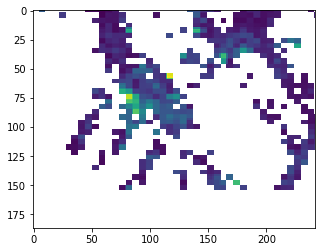

In [177]:
plt.imshow(gedi)

In [178]:
import numpy as np
import numpy.ma as ma
import rasterio


def get_s2_data(use_100m):
    
    bands = ["B02", "B03", "B04", "B08"]
    
    Xt, Xv = [], []
    s2_mask = None
    for band_name in bands:
        
        if use_100m: file_path = f'/shared_space/G1/s2/{band_name}_composite_100m.tif'
        else:        file_path = f'/shared_space/G1/s2/{band_name}_composite.tif'
            
        with rasterio.open(file_path) as band_src:
            band_data = band_src.read(1, masked=True, window=window_)
            Xv.append(band_data)

            if s2_mask is None:
                s2_mask = band_data.mask

    red, nir = Xv[2], Xv[3]
    ndvi = (nir.astype(np.float64) - red.astype(np.float64)) / (nir + red)
    Xv.append(ndvi)
    
    for full_band in Xv:
        masked_band = full_band.copy()
        masked_band.mask = masked_band.mask | gedi_mask
        Xt.append(masked_band)

    Xv = ma.stack(Xv, axis=0)
    Xv_flat = np.reshape(Xv, (Xv.shape[0], Xv.shape[1]*Xv.shape[2])).T

    Xt = ma.stack(Xt, axis=0)
    Xt_flat = np.reshape(Xt, (Xt.shape[0], Xt.shape[1]*Xt.shape[2])).T

    return (Xt, Xt_flat, Xv, Xv_flat, s2_mask)
    

Xt, Xt_flat, Xv, Xv_flat, s2_mask = get_s2_data(USE_100M)

gedi.mask = s2_mask | gedi_mask
gedi_flat = np.reshape(gedi, gedi.shape[0]*gedi.shape[1])

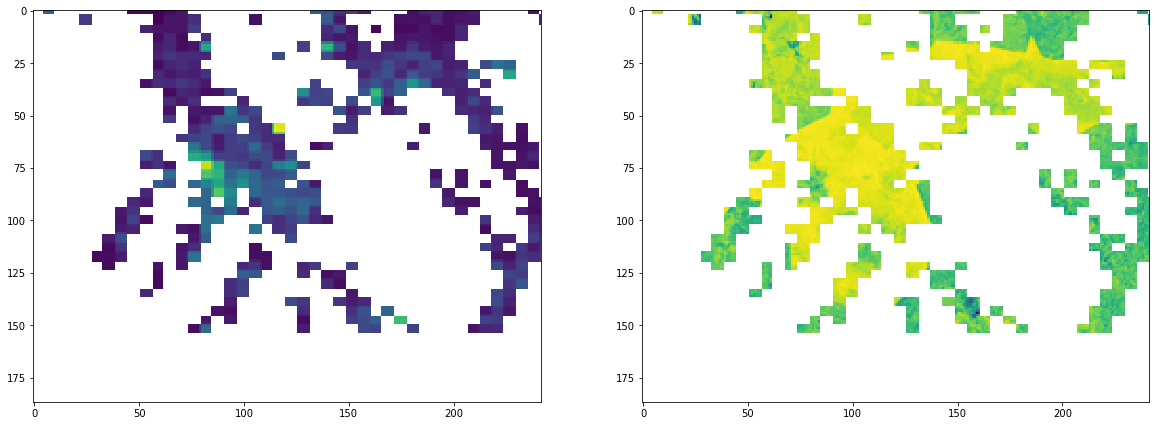

In [179]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(gedi)
axes[1].imshow(Xt[4, :, :])
plt.show()

In [180]:
Xt_flat_mask = Xt_flat.mask[:, 0]

Xt_flat_trimmed = Xt_flat[~Xt_flat_mask, :]
gedi_flat_trimmed = gedi_flat[~gedi_flat.mask]

In [181]:
%%time

import sklearn.ensemble

# 100, 1, True
rf_clf = sklearn.ensemble.RandomForestRegressor(n_estimators=10, random_state=1, oob_score=True)
rf_clf = rf_clf.fit(Xt_flat_trimmed, gedi_flat_trimmed)

print(f'OOB score: {rf_clf.oob_score_}')

OOB score: -0.003434806228002074
CPU times: user 480 ms, sys: 3.86 ms, total: 484 ms
Wall time: 482 ms


/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


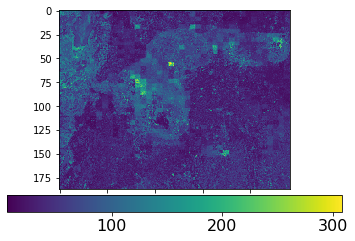

In [182]:
%matplotlib inline

preds = rf_clf.predict(Xt_flat)
preds = preds.reshape(gedi.shape)

plt.imshow(preds)
cb = plt.colorbar(orientation='horizontal', pad=0.03)
cb.ax.tick_params(labelsize=16)

(5, 374, 484)
(181016, 5)


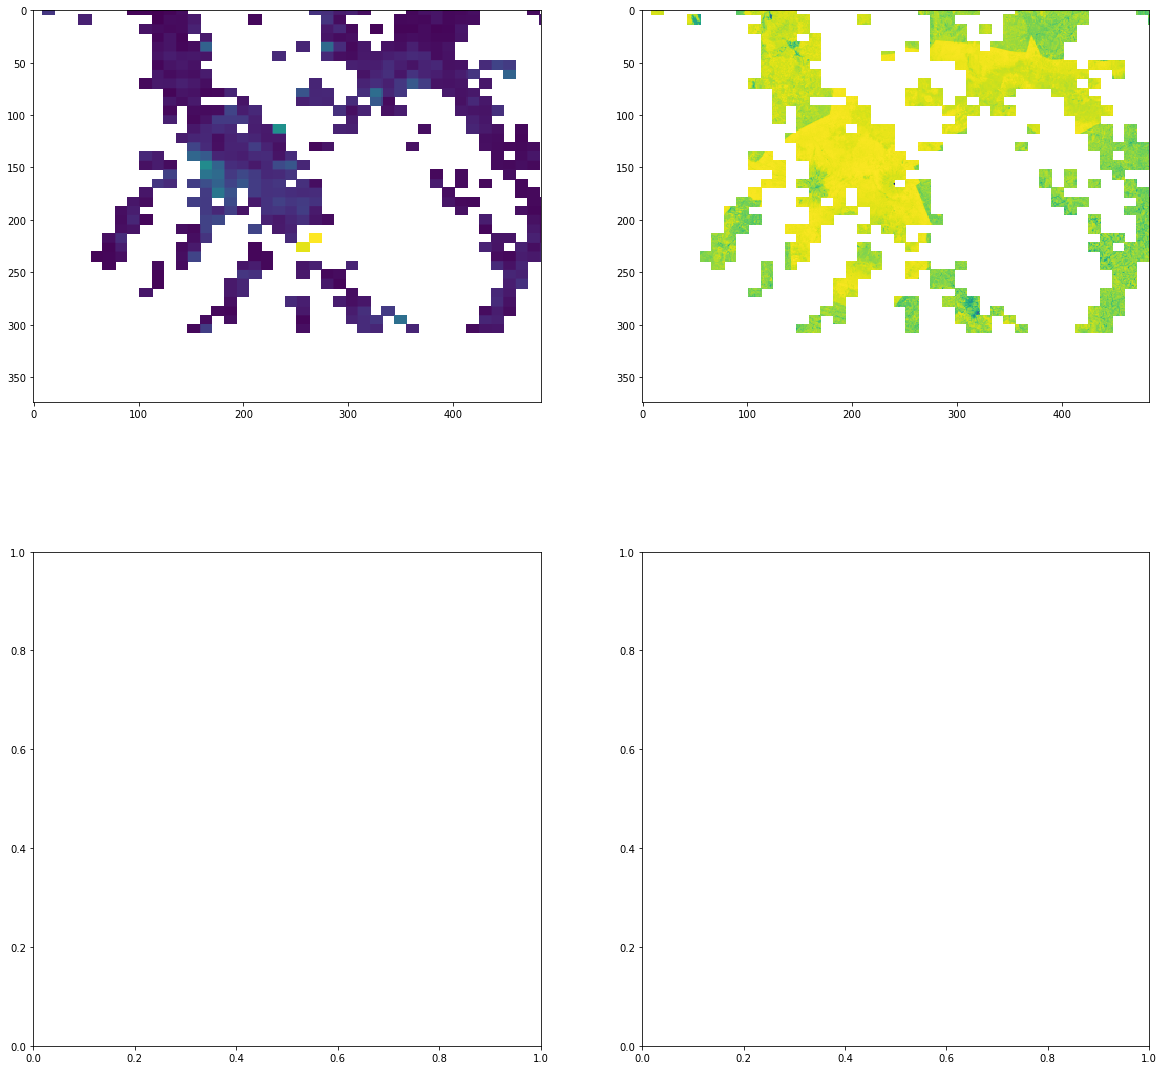

In [68]:
print(Xv.shape)
print(Xv_flat.shape)

nir = Xv_flat[:, 4].reshape(gedi.shape)

fig, axes = plt.subplots(2, 2, figsize=(20, 20))

axes[0][0].imshow(gedi)
axes[0][1].imshow(Xt[4, :, :])


plt.show()
